In [1]:
!pip install tensorflow==1.14
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 109.2MB 91kB/s 
     |████████████████████████████████| 3.2MB 43.3MB/s 
     |████████████████████████████████| 491kB 46.6MB/s 
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0


In [2]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import glob

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/DL\ project/datasets/person
# %ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/DL project/datasets/person


In [0]:
images_paths = glob.glob('./*.jpg')

In [5]:
len(images_paths)

986

In [6]:
images_paths_train = images_paths[:980]
len(images_paths_train)

980

In [0]:
images_train = []

for image_path in images_paths_train:
  image_mat = img_to_array(load_img(image_path))
  image_mat = np.array(image_mat, dtype=float)

  images_train.append(image_mat)

In [8]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [9]:
# Finish model
model.compile(optimizer='rmsprop',loss='mse')

In [0]:
# plt.imshow(images_train[0])

In [11]:
images_train[0].shape

(256, 256, 3)

In [0]:
for i, image_train in enumerate(images_train):
  print("----------------------- "+str(i)+" -----------------------")
  X = rgb2lab(1.0/255*images_train[0])[:,:,0]
  Y = rgb2lab(1.0/255*images_train[0])[:,:,1:]
  Y /= 128
  X = X.reshape(1, 256, 256, 1)
  Y = Y.reshape(1, 256, 256, 2)

  model.fit(x=X, y=Y,batch_size=1,epochs=20)

Streaming output truncated to the last 5000 lines.
Epoch 14/20
1/1 [==============================] - 0s 145ms/step - loss: 3.7407e-05
Epoch 15/20
1/1 [==============================] - 0s 148ms/step - loss: 3.2939e-05
Epoch 16/20
1/1 [==============================] - 0s 150ms/step - loss: 3.0573e-05
Epoch 17/20
1/1 [==============================] - 0s 147ms/step - loss: 3.1986e-05
Epoch 18/20
1/1 [==============================] - 0s 149ms/step - loss: 3.2084e-05
Epoch 19/20
1/1 [==============================] - 0s 146ms/step - loss: 3.8404e-05
Epoch 20/20
1/1 [==============================] - 0s 144ms/step - loss: 4.5738e-05
----------------------- 697 -----------------------
Epoch 1/20
1/1 [==============================] - 0s 141ms/step - loss: 5.4801e-05
Epoch 2/20
1/1 [==============================] - 0s 149ms/step - loss: 6.2326e-05
Epoch 3/20
1/1 [==============================] - 0s 148ms/step - loss: 5.1381e-05
Epoch 4/20
1/1 [==============================] - 0s 147ms/s

In [0]:
print(model.evaluate(X, Y, batch_size=1))

1/1 [==============================] - 0s 113ms/step
3.714972626767121e-05


In [0]:
# model.fit(x=X, y=Y,batch_size=1,epochs=5)
test_img_id = 984

In [0]:
img = Image.open(images_paths[test_img_id]).convert('LA')
img.save('test.png')

In [0]:
image_test = img_to_array(load_img(images_paths[test_img_id]))
image_test = np.array(image_test, dtype=float)

In [0]:
X_test = rgb2lab(1.0/255*image_test)[:,:,0]
Y_test = rgb2lab(1.0/255*image_test)[:,:,1:]
Y_test /= 128
X_test = X_test.reshape(1, 256, 256, 1)
Y_test = Y_test.reshape(1, 256, 256, 2)

In [0]:
print(model.evaluate(X_test, Y_test, batch_size=1))
output_test = model.predict(X_test)
output_test *= 128
# Output_test colorizations
cur_test = np.zeros((256, 256, 3))
cur_test[:,:,0] = X_test[0][:,:,0]
cur_test[:,:,1:] = output_test[0]

1/1 [==============================] - 0s 49ms/step
0.012583939358592033


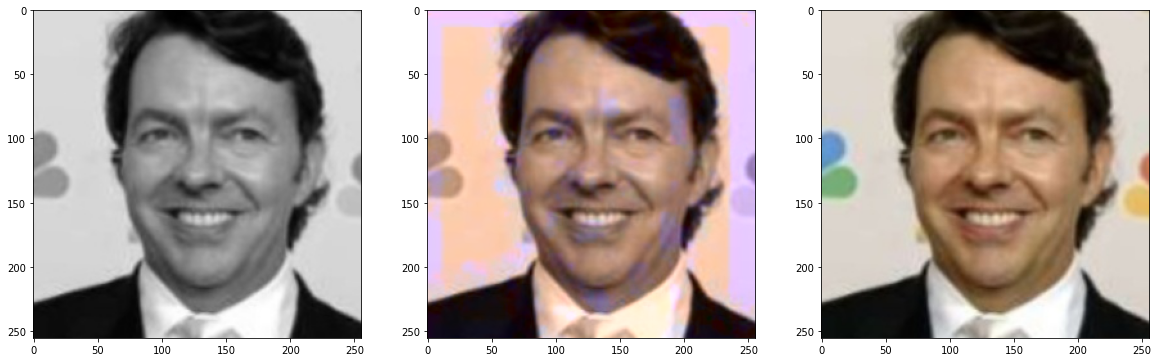

In [0]:
# f, axarr = plt.subplots(1,3)
# axarr[0,0].imshow(load_img(images_paths[984]))
# axarr[0,1].imshow(load_img("test.png"))
# axarr[0,2].imshow(lab2rgb(cur_test))


fig = plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(load_img("test.png"))
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(lab2rgb(cur_test))
ax3 = fig.add_subplot(2,3,3)
ax3.imshow(load_img(images_paths[test_img_id]))


In [0]:

# plt.imshow(lab2rgb(cur_test))


# imsave("img_result_man.png", lab2rgb(cur_test))
# imsave("img_gray_version_man.png", rgb2gray(lab2rgb(cur_test)))